<a href="https://colab.research.google.com/github/yildiz3/NLP/blob/master/Projects/NLP_Sentiment_Analysis_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

At the end of this project, we will see how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
#pip install scikit-learn-intelex

In [ ]:
#from sklearnex import patch_sklearn
#patch_sklearn()

In [ ]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
df0 = pd.read_csv("drive/MyDrive/csv/Womens_Clothing_E-Commerce_Reviews.csv"),index_col = 0)

In [ ]:
df0.head(5)

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

In [ ]:
df = df0.copy()

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.duplicated().sum()

21

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.Rating.value_counts(dropna=False)

5    13111
4     5076
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [ ]:
df["Division Name"].value_counts(dropna=False)

General           13839
General Petite     8110
Initmates          1502
NaN                  14
Name: Division Name, dtype: int64

In [ ]:
df['Clothing ID'].value_counts(dropna=False)

1078    1021
862      802
1094     753
1081     582
872      544
        ... 
776        1
668        1
633        1
734        1
522        1
Name: Clothing ID, Length: 1206, dtype: int64

In [ ]:
df[(df["Title"].isnull()) & (df["Review Text"].isnull())]

Clothing ID  Age Title Review Text  Rating  Recommended IND  \
92             861   23   NaN         NaN       5                1   
93            1081   31   NaN         NaN       5                1   
98            1133   50   NaN         NaN       5                1   
135            861   35   NaN         NaN       4                1   
142           1126   35   NaN         NaN       5                1   
...            ...  ...   ...         ...     ...              ...   
23166         1094   62   NaN         NaN       4                1   
23224         1087   42   NaN         NaN       3                1   
23301          862   52   NaN         NaN       5                1   
23303          823   46   NaN         NaN       5                1   
23470         1104   39   NaN         NaN       5                1   

       Positive Feedback Count   Division Name Department Name Class Name  
92                           0  General Petite            Tops      Knits  
93                           0         General         Dresses    Dresses  
98                           0         General         Jackets  Outerwear  
135                          0  General Petite            Tops      Knits  
142                          0         General         Jackets  Outerwear  
...                        ...             ...             ...        ...  
23166                        0         General         Dresses    Dresses  
23224                        0  General Petite         Dresses    Dresses  
23301                        0         General            Tops      Knits  
23303                        0         General            Tops    Blouses  
23470                        0  General Petite         Dresses    Dresses  

[824 rows x 10 columns]

In [ ]:
df.shape

(23465, 10)

In [ ]:
#df.new_review = df.Title + " "+ df["Review Text"]

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df['Recommended IND'].value_counts()

1    19293
0     4172
Name: Recommended IND, dtype: int64

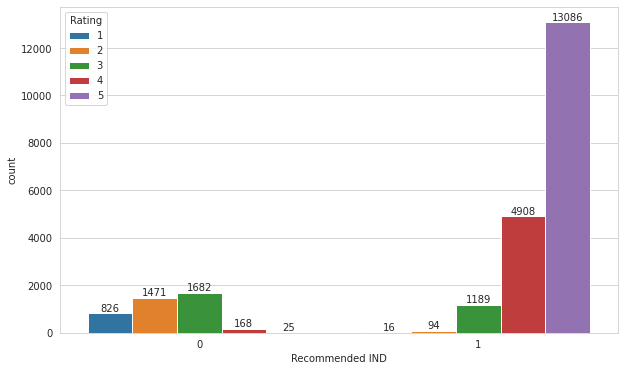

In [ ]:
ax = sns.countplot(data = df, x="Recommended IND", hue="Rating")

for p in ax.containers:
    ax.bar_label(p)


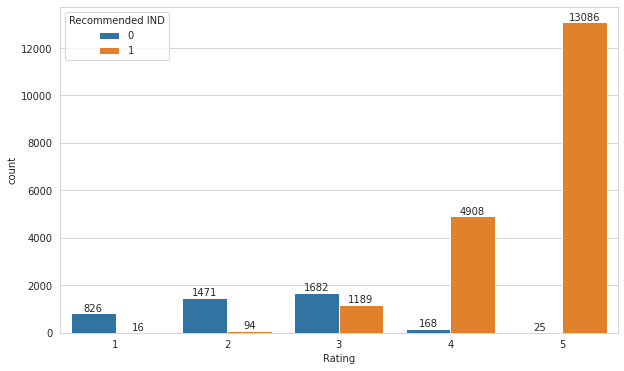

In [ ]:
ax = sns.countplot(data =df, x = "Rating", hue="Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
np.array(df[(df["Rating"] < 2) & (df["Recommended IND"] == 1)]["Review Text"].head(15))

array(["Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.",
       'Very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased the denim print.',
       'I love this t-shirt because it has the combination of elegance and relazation to a "t".\r\nit\'s soft, pretty and covers my wide bottom well.',
       'Love the movement of the blouse and how it falls. great quality material.',
       'I loved the color and design until i tried it on in the store. i am 5\'5" with a slender build. i tried my usual xs but couldn\'t manage to put this shirt on me without risking smear my makeup or scratch my face by the elastic band at the neckline. the band is so small even fully stretched out. i have a normal sized head just in case you wonder... i gave up after wrestling with it. i can only imagine how uncomfortable to wear something with a tight elastic band choking me...funny... but not fu

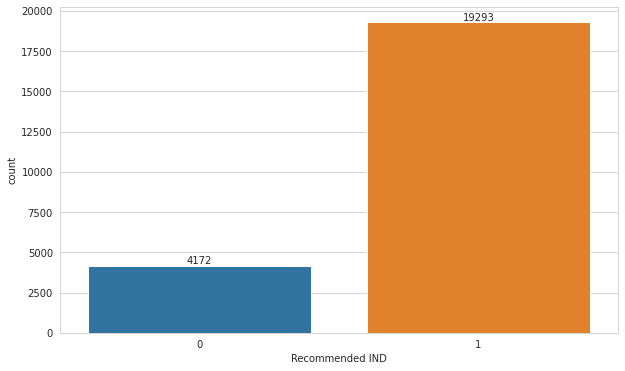

In [ ]:
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

In [ ]:
# recall_Poor =  make_scorer(recall_score, average=None, labels=["0"])
# scoring = {"f1_Poor" : make_scorer(f1_score, average = None, labels =["0"]),
#            "precision_Poor" : make_scorer(precision_score, average = None, labels =["0"]),
#            "recall_Poor" : make_scorer(recall_score, average = None, labels =["0"])}

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df.rename(columns={"Review Text":"text", "Recommended IND":"recommend"}, 
          inplace=True)

In [ ]:
df.head(10)

Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                                text  Rating  recommend  \
0  Absolutely wonderful - silky and sexy and comf...       4          1   
1  Love this dress!  it's sooo pretty.  i happene...       5          1   
2  I had such high hopes for this dress and reall...       3          0   
3  I love, love, love this jumpsuit. it's fun, fl...       5          1   
4  This shirt is very flattering to all due to th...       5          1   
5  I love tracy reese dresses, but this one is no...       2          0   
6  I aded this in my basket at hte last mintue to...       5          1   
7  I ordered this in carbon for store pick up, an...       4          1   
8  I love this dress. i usually get an xs but it ...       5          1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5          1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits  
7                        4  General Petite            Tops      Knits  
8                        0         General         Dresses    Dresses  
9                        0         General         Dresses    Dresses

In [ ]:
df=df[['text','recommend']]
df.head()

text  recommend
0  Absolutely wonderful - silky and sexy and comf...          1
1  Love this dress!  it's sooo pretty.  i happene...          1
2  I had such high hopes for this dress and reall...          0
3  I love, love, love this jumpsuit. it's fun, fl...          1
4  This shirt is very flattering to all due to th...          1

---
---


### Missing Value Detection

In [ ]:
df.isnull().sum()

text         825
recommend      0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
#Second way
# drop_index = df[df["Review Text"].isnull() == True].index
# drop_index

In [ ]:
#df.drop(index = drop_index, axis = 1, inplace = True )

In [ ]:
#Third way
#df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

text         0
recommend    0
dtype: int64

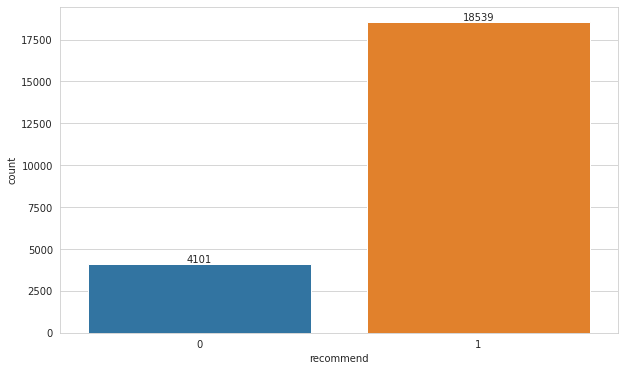

In [ ]:
ax = sns.countplot(data=df, x="recommend")
ax.bar_label(ax.containers[0]);

### Changing target's value

In [ ]:
df.recommend = df.recommend.map({1:0, 0:1})

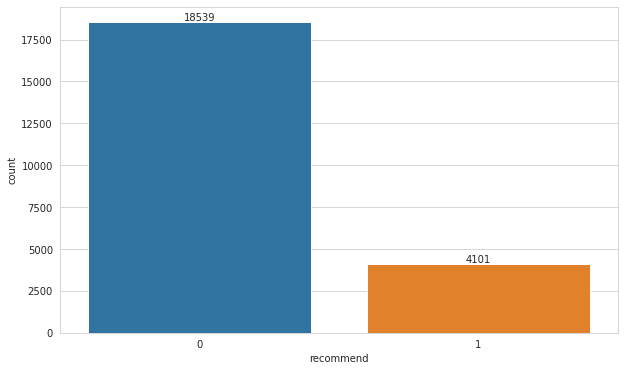

In [ ]:
ax = sns.countplot(data=df, x="recommend")
ax.bar_label(ax.containers[0]);

In [ ]:
df.recommend.value_counts(normalize=True)

0   0.819
1   0.181
Name: recommend, dtype: float64

In [ ]:
df.reset_index(drop=True, inplace=True) # Don't forget to reset index
df

text  recommend
0      Absolutely wonderful - silky and sexy and comf...          0
1      Love this dress!  it's sooo pretty.  i happene...          0
2      I had such high hopes for this dress and reall...          1
3      I love, love, love this jumpsuit. it's fun, fl...          0
4      This shirt is very flattering to all due to th...          0
...                                                  ...        ...
22635  I was very happy to snag this dress at such a ...          0
22636  It reminds me of maternity clothes. soft, stre...          0
22637  This fit well, but the top was very see throug...          1
22638  I bought this dress for a wedding i have this ...          0
22639  This dress in a lovely platinum is feminine an...          0

[22640 rows x 2 columns]

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = stopwords.words('english')

for i in ["not", "no"]: #we kept "not" and "no"
        stop_words.remove(i)

In [ ]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
cleaning_text = df["text"].apply(cleaning)
np.array(cleaning_text.head(5))

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
       'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt'],
      dtype=object)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [ ]:
positive_reviews = df[df["recommend"] == 1]["text"] # positive_reviews assigned
positive_reviews = positive_reviews.apply(cleaning)
positive_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22605    tried color really pretty fun donset want pair...
22606    wanted love jacket soft great color unfortunat...
22616    purchased good price typically love maeve fabr...
22633    surprised positive review product terrible cut...
22637    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

In [ ]:
negative_reviews = df[df["recommend"] == 0]["text"]
negative_reviews = negative_reviews.apply(cleaning)
negative_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22634    wasnt sure ordering skirt couldnt see person f...
22635    happy snag dress great price easy slip flatter...
22636    reminds maternity clothes soft stretchy shiny ...
22638    bought dress wedding summer cute unfortunately...
22639    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18539, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive_reviews)
positive_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

In [ ]:
negative_words = " ".join(negative_reviews)
negative_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

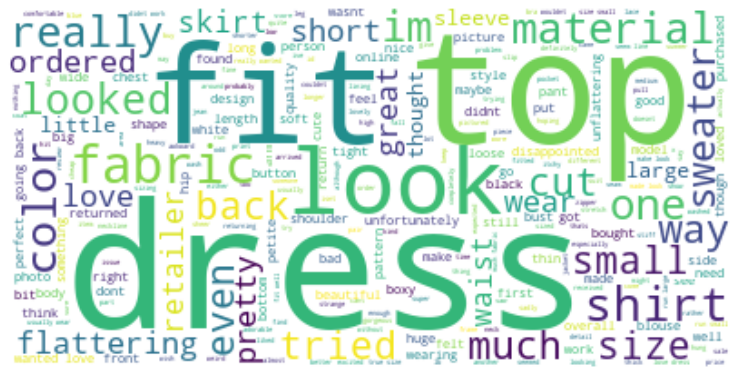

In [ ]:
worldcloud_positive = WordCloud(background_color="white", max_words =250)
worldcloud_positive.generate(positive_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_positive, interpolation="bilinear",) 
plt.axis("off")
plt.show()

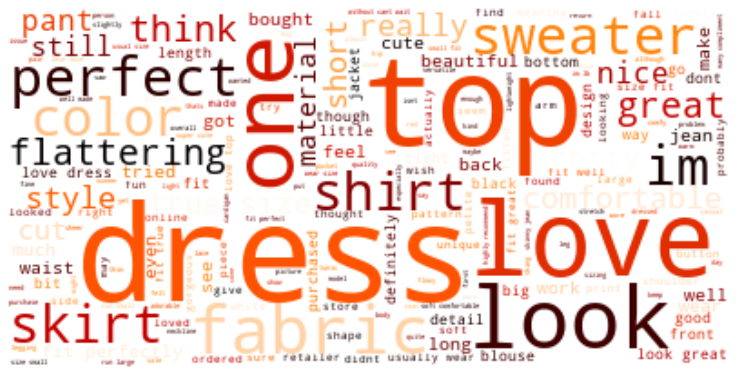

In [ ]:
wordcloud_negative = WordCloud(background_color="white", 
                               max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["text"]
y = df["recommend"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X_train

21011    Love the gorgeous mustard/goldenrod shade but ...
5359     I found this in store last weekend and thought...
5754     The only negative thing i have to say is that ...
21126    The title says it all...\r\nperfect go-to tank...
13767    Following the advice of other reviews, i order...
                               ...                        
21930    I really liked the fabric and the design of th...
19563    The jeans are even better in person. great fit...
22407    I wanted to love this skirt it was good qualit...
14153    I absolutely love this top! it is soft, comfor...
11453    I purchased the blue version in store. it's a ...
Name: text, Length: 18112, dtype: object

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray() #turn to array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0       0     0        0        0     0    0         0           0         0   
1       0     0        0        0     0    0         0           0         0   
2       0     0        0        0     0    0         0           0         0   
3       0     0        0        0     0    0         0           0         0   
4       0     0        0        0     0    0         0           0         0   
...    ..   ...      ...      ...   ...  ...       ...         ...       ...   
18107   0     0        0        0     0    0         0           0         0   
18108   0     0        0        0     0    0         0           0         0   
18109   0     0        0        0     0    0         0           0         0   
18110   0     0        0        0     0    0         0           1         0   
18111   0     0        0        0     0    0         0           0         0   

       absurd  abt  abundance  ac  accent  accented  accentuate  accentuated  \
0           0    0          0   0       0         0           0            0   
1           0    0          0   0       0         0           0            0   
2           0    0          0   0       0         0           0            0   
3           0    0          0   0       0         0           0            0   
4           0    0          0   0       0         0           0            0   
...       ...  ...        ...  ..     ...       ...         ...          ...   
18107       0    0          0   0       0         0           0            0   
18108       0    0          0   0       0         0           0            0   
18109       0    0          0   0       0         0           0            0   
18110       0    0          0   0       0         0           0            0   
18111       0    0          0   0       0         0           0            0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0                0             0       0           0       0            0   
1                0             0       0           0       0            0   
2                0             0       0           0       0            0   
3                0             0       0           0       0            0   
4                0             0       0           0       0            0   
...            ...           ...     ...         ...     ...          ...   
18107            0             0       0           0       0            0   
18108            0             0       0           0       0            0   
18109            0             0       0           0       0            0   
18110            0             0       0           0       0            0   
18111            0             0       0           0       0            0   

       accessorized  accessorizing  accessory  accident  accidental  \
0                 0              0          0         0           0   
1                 0              0          0         0           0   
2                 0              0          0         0           0   
3                 0              0          0         0           0   
4                 0              0          0         0           0   
...             ...            ...        ...       ...         ...   
18107             0              0          0         0           0   
18108             0              0          0         0           0   
18109             0              0          0         0           0   
18110             0              0          0         0           0   
18111             0              0          0         0           0   

       accidentally  accommodate  accommodates  according  accordingly  \
0                 0            0             0          0            0   
1                 0            0             0          0            0   
2                 0            0             0          0            0   
3          

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29303892],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), 
             columns = tf_idf_vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
4     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.324   
18111 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       abstract  absurd   abt  abundance    ac  accent  accented  accentuate  \
0         0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
1         0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
2         0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
3         0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
4         0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
...         ...     ...   ...        ...   ...     ...       ...         ...   
18107     0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
18108     0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
18109     0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
18110     0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   
18111     0.000   0.000 0.000      0.000 0.000   0.000     0.000       0.000   

       accentuated  accentuates  accentuating  accept  acceptable  access  \
0            0.000        0.000         0.000   0.000       0.000   0.000   
1            0.000        0.000         0.000   0.000       0.000   0.000   
2            0.000        0.000         0.000   0.000       0.000   0.000   
3            0.000        0.000         0.000   0.000       0.000   0.000   
4            0.000        0.000         0.000   0.000       0.000   0.000   
...            ...          ...           ...     ...         ...     ...   
18107        0.000        0.000         0.000   0.000       0.000   0.000   
18108        0.000        0.000         0.000   0.000       0.000   0.000   
18109        0.000        0.000         0.000   0.000       0.000   0.000   
18110        0.000        0.000         0.000   0.000       0.000   0.000   
18111        0.000        0.000         0.000   0.000       0.000   0.000   

       accessorize  accessorized  accessorizing  accessory  accident  \
0            0.000         0.000          0.000      0.000     0.000   
1            0.000         0.000          0.000      0.000     0.000   
2            0.000         0.000          0.000      0.000     0.000   
3            0.000         0.000          0.000      0.000     0.000   
4            0.000         0.000          0.000      0.000     0.000   
...            ...           ...            ...        ...       ...   
18107        0.000         0.000          0.000      0.000     0.000   
18108        0.000         0.000          0.000      0.000     0.000   
18109        0.000         0.000          0.000      0.000     0.000   
18110        0.000         0.000          0.000      0.000     0.000   
18111        0.000         0.000          0.000      0.000     0.000   

       accidental  accidentally  accommodate  accommodates  according  \
0           0.000         0.000        0.000         0.000      0.000   
1           0.000         0.000        0.000         0.000      0.000   
2           0.000         0.000        0.000         0.000      0.000   
3           0.000         0.000        0.000         0.000      0.000   
4           0.00

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### CountVectorizer

In [ ]:
log = LogisticRegression(C = 0.02, max_iter=1000, 
                         class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3162  546]
 [ 116  704]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      3708
           1       0.56      0.86      0.68       820

    accuracy                           0.85      4528
   macro avg       0.76      0.86      0.79      4528
weighted avg       0.89      0.85      0.86      4528

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.60      0.90      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
model = LogisticRegression(C = 0.02, max_iter=1000, 
                           class_weight= "balanced", random_state=101)
scoring = {'accuracy': make_scorer(accuracy_score), #ilhan
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1': make_scorer(f1_score)}
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.167       0.008          0.849           0.873           0.556   
2      0.164       0.005          0.850           0.872           0.558   
3      0.159       0.005          0.854           0.873           0.565   
4      0.159       0.005          0.854           0.872           0.564   
5      0.167       0.005          0.860           0.872           0.576   
6      0.157       0.005          0.851           0.873           0.559   
7      0.155       0.005          0.853           0.873           0.558   
8      0.163       0.005          0.860           0.871           0.576   
9      0.154       0.005          0.850           0.872           0.556   
10     0.154       0.005          0.865           0.872           0.588   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.601        0.820         0.898    0.663     0.720  
2             0.598        0.833         0.897    0.668     0.718  
3             0.600        0.838         0.897    0.675     0.719  
4             0.598        0.848         0.896    0.677     0.717  
5             0.597        0.860         0.895    0.689     0.716  
6             0.599        0.838         0.899    0.671     0.719  
7             0.599        0.896         0.895    0.688     0.718  
8             0.596        0.863         0.895    0.691     0.716  
9             0.599        0.841         0.897    0.670     0.718  
10            0.598        0.841         0.897    0.693     0.718

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.854
train_accuracy    0.872
test_precision    0.566
train_precision   0.599
test_recall       0.848
train_recall      0.897
test_f1           0.678
train_f1          0.718
dtype: float64

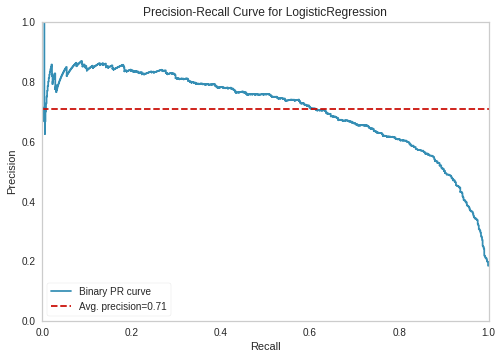

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000, 
                       class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
    )
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, average = None)
log_count_f1 = f1_score(y_test, y_pred, average = None)
log_AP = viz.score_

In [ ]:
print(log_AP)

0.7086917063008475


### TF-IDF

In [ ]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3185  523]
 [ 104  716]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3708
           1       0.58      0.87      0.70       820

    accuracy                           0.86      4528
   macro avg       0.77      0.87      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.91      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [ ]:
model = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, 
                        scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.110       0.005          0.857           0.883           0.572   
2      0.112       0.005          0.854           0.881           0.565   
3      0.115       0.005          0.856           0.881           0.569   
4      0.128       0.005          0.863           0.881           0.582   
5      0.121       0.005          0.871           0.878           0.599   
6      0.115       0.005          0.860           0.881           0.576   
7      0.117       0.005          0.857           0.881           0.565   
8      0.116       0.005          0.861           0.879           0.577   
9      0.118       0.005          0.854           0.881           0.564   
10     0.114       0.005          0.869           0.879           0.599   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.619        0.832         0.918    0.678     0.740  
2             0.615        0.842         0.915    0.676     0.735  
3             0.616        0.860         0.918    0.684     0.737  
4             0.614        0.866         0.919    0.696     0.736  
5             0.609        0.878         0.913    0.712     0.731  
6             0.614        0.863         0.919    0.691     0.736  
7             0.615        0.909         0.914    0.697     0.735  
8             0.612        0.869         0.914    0.693     0.733  
9             0.615        0.851         0.919    0.678     0.737  
10            0.610        0.838         0.917    0.699     0.733

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.860
train_accuracy    0.880
test_precision    0.577
train_precision   0.614
test_recall       0.861
train_recall      0.917
test_f1           0.691
train_f1          0.735
dtype: float64

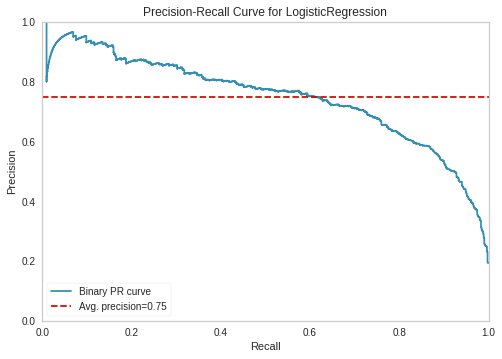

In [ ]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.6, max_iter=1000, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 



In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

### Countvectorizer

In [ ]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=1)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3364  344]
 [ 215  605]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3708
           1       0.64      0.74      0.68       820

    accuracy                           0.88      4528
   macro avg       0.79      0.82      0.80      4528
weighted avg       0.89      0.88      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.68      0.79      0.73      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.83     18112
weighted avg       0.90      0.90      0.90     18112



In [ ]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, 
                        scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.013       0.006          0.869           0.898           0.622   
2      0.013       0.006          0.876           0.898           0.633   
3      0.013       0.006          0.882           0.897           0.654   
4      0.013       0.006          0.880           0.897           0.643   
5      0.013       0.006          0.866           0.896           0.618   
6      0.014       0.007          0.865           0.899           0.609   
7      0.013       0.006          0.868           0.896           0.609   
8      0.012       0.006          0.885           0.897           0.666   
9      0.012       0.006          0.877           0.898           0.645   
10     0.012       0.006          0.882           0.896           0.648   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.688        0.701         0.796    0.659     0.738  
2             0.689        0.751         0.795    0.687     0.738  
3             0.688        0.738         0.791    0.693     0.736  
4             0.689        0.762         0.791    0.697     0.736  
5             0.684        0.686         0.791    0.650     0.734  
6             0.693        0.704         0.792    0.653     0.739  
7             0.687        0.756         0.787    0.675     0.733  
8             0.686        0.729         0.793    0.696     0.736  
9             0.691        0.720         0.794    0.680     0.739  
10            0.684        0.759         0.789    0.699     0.733

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.875
train_accuracy    0.897
test_precision    0.635
train_precision   0.688
test_recall       0.731
train_recall      0.792
test_f1           0.679
train_f1          0.736
dtype: float64

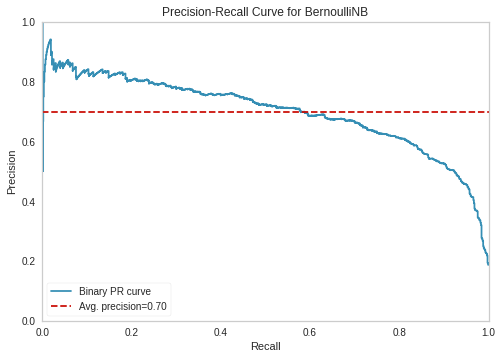

In [ ]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=1),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

In [ ]:
print (nb_count_f1)

0.6840022611644997


### TF-IDF

In [ ]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3364  344]
 [ 215  605]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3708
           1       0.64      0.74      0.68       820

    accuracy                           0.88      4528
   macro avg       0.79      0.82      0.80      4528
weighted avg       0.89      0.88      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.68      0.79      0.73      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.83     18112
weighted avg       0.90      0.90      0.90     18112



In [ ]:
model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf, y_train, 
                        scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.875
train_accuracy    0.897
test_precision    0.635
train_precision   0.688
test_recall       0.731
train_recall      0.792
test_f1           0.679
train_f1          0.736
dtype: float64

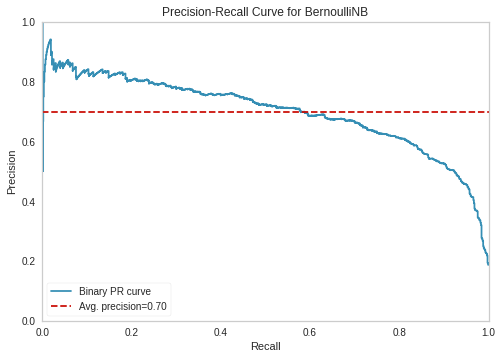

In [ ]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3549  159]
 [ 344  476]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3708
           1       0.75      0.58      0.65       820

    accuracy                           0.89      4528
   macro avg       0.83      0.77      0.79      4528
weighted avg       0.88      0.89      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14831
           1       0.85      0.65      0.73      3281

    accuracy                           0.91     18112
   macro avg       0.89      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [ ]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, 
                        scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.061       0.005          0.881           0.917           0.733   
2      0.063       0.005          0.889           0.915           0.763   
3      0.063       0.005          0.893           0.916           0.770   
4      0.057       0.005          0.888           0.916           0.765   
5      0.063       0.005          0.886           0.915           0.769   
6      0.063       0.005          0.887           0.916           0.743   
7      0.057       0.005          0.886           0.915           0.734   
8      0.055       0.005          0.896           0.915           0.799   
9      0.063       0.005          0.889           0.915           0.775   
10     0.064       0.005          0.892           0.916           0.770   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.853        0.543         0.653    0.623     0.740  
2             0.847        0.559         0.648    0.646     0.734  
3             0.851        0.582         0.647    0.663     0.736  
4             0.850        0.555         0.651    0.643     0.737  
5             0.848        0.527         0.649    0.626     0.735  
6             0.850        0.573         0.653    0.647     0.738  
7             0.851        0.579         0.644    0.647     0.733  
8             0.846        0.570         0.648    0.665     0.734  
9             0.852        0.546         0.644    0.640     0.733  
10            0.854        0.573         0.648    0.657     0.737

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.889
train_accuracy    0.916
test_precision    0.762
train_precision   0.850
test_recall       0.561
train_recall      0.648
test_f1           0.646
train_f1          0.736
dtype: float64

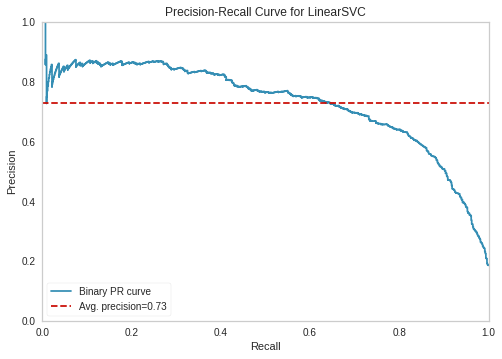

In [ ]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, average = None)
svc_count_f1 = f1_score(y_test, y_pred, average = None)
svc_AP = viz.score_

In [ ]:
print(svc_count_f1[1])

0.6542955326460481


### TD-IDF

In [ ]:
svc = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3185  523]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3708
           1       0.58      0.87      0.69       820

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14831
           1       0.64      0.94      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



In [ ]:
model = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.052       0.006          0.860           0.897           0.580   
2      0.052       0.005          0.858           0.896           0.575   
3      0.053       0.005          0.865           0.896           0.589   
4      0.055       0.005          0.863           0.897           0.581   
5      0.053       0.005          0.874           0.894           0.605   
6      0.051       0.005          0.866           0.896           0.590   
7      0.053       0.005          0.858           0.895           0.571   
8      0.053       0.005          0.870           0.895           0.596   
9      0.053       0.005          0.859           0.895           0.574   
10     0.052       0.005          0.879           0.893           0.622   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.648        0.832         0.939    0.683     0.767  
2             0.647        0.836         0.938    0.682     0.766  
3             0.648        0.851         0.939    0.696     0.767  
4             0.649        0.860         0.940    0.694     0.768  
5             0.642        0.878         0.936    0.716     0.762  
6             0.646        0.860         0.939    0.700     0.765  
7             0.645        0.872         0.938    0.690     0.764  
8             0.644        0.869         0.937    0.707     0.763  
9             0.645        0.848         0.939    0.685     0.765  
10            0.641        0.848         0.937    0.717     0.761

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.865
train_accuracy    0.895
test_precision    0.588
train_precision   0.645
test_recall       0.855
train_recall      0.938
test_f1           0.697
train_f1          0.765
dtype: float64

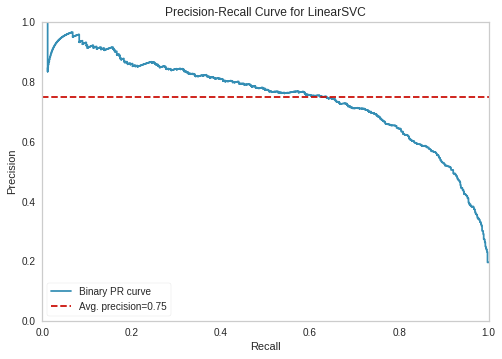

In [ ]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
    )
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 8, 
                            random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3131  577]
 [ 164  656]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3708
           1       0.53      0.80      0.64       820

    accuracy                           0.84      4528
   macro avg       0.74      0.82      0.77      4528
weighted avg       0.87      0.84      0.85      4528

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.57      0.86      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.86      0.80     18112
weighted avg       0.89      0.86      0.87     18112



In [ ]:
model = RandomForestClassifier(100, max_depth = 8, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, 
                        scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      3.208       0.119          0.819           0.819           0.000   
2      0.457       0.115          0.818           0.819           0.000   
3      0.458       0.115          0.819           0.819           0.000   
4      0.451       0.115          0.819           0.819           0.000   
5      0.464       0.116          0.819           0.819           0.000   
6      0.458       0.114          0.819           0.819           0.000   
7      0.464       0.116          0.819           0.819           0.000   
8      0.451       0.116          0.819           0.819           0.000   
9      0.456       0.115          0.819           0.819           0.000   
10     0.454       0.116          0.819           0.819           0.000   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.000        0.000         0.000    0.000     0.000  
2             0.000        0.000         0.000    0.000     0.000  
3             0.000        0.000         0.000    0.000     0.000  
4             0.000        0.000         0.000    0.000     0.000  
5             0.000        0.000         0.000    0.000     0.000  
6             0.000        0.000         0.000    0.000     0.000  
7             0.000        0.000         0.000    0.000     0.000  
8             0.000        0.000         0.000    0.000     0.000  
9             0.000        0.000         0.000    0.000     0.000  
10            0.000        0.000         0.000    0.000     0.000

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.819
train_accuracy    0.819
test_precision    0.000
train_precision   0.000
test_recall       0.000
train_recall      0.000
test_f1           0.000
train_f1          0.000
dtype: float64

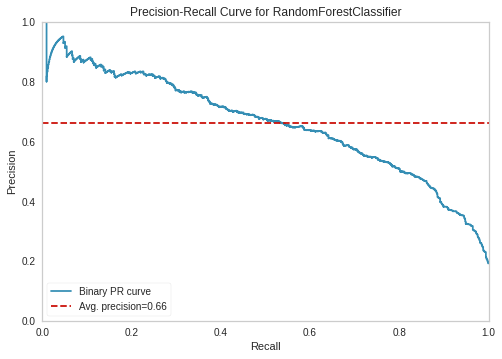

In [ ]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 8, 
                           random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, average = None)
rf_count_f1 = f1_score(y_test, y_pred, average = None)
rf_AP = viz.score_

### TF-IDF

In [ ]:
rf = RandomForestClassifier(100, max_depth=8, 
                            random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3107  601]
 [ 174  646]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3708
           1       0.52      0.79      0.63       820

    accuracy                           0.83      4528
   macro avg       0.73      0.81      0.76      4528
weighted avg       0.87      0.83      0.84      4528

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.59      0.87      0.70      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.87     18112



In [ ]:
model = RandomForestClassifier(100, max_depth = 8, random_state = 42, 
                               n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, 
                        scoring = scoring, cv = 10,  return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.515       0.117          0.831           0.862           0.521   
2      0.490       0.114          0.828           0.861           0.516   
3      0.485       0.117          0.829           0.856           0.517   
4      0.484       0.115          0.823           0.857           0.507   
5      0.486       0.115          0.815           0.853           0.493   
6      0.497       0.115          0.819           0.856           0.500   
7      0.499       0.116          0.828           0.858           0.515   
8      0.526       0.115          0.826           0.867           0.512   
9      0.527       0.116          0.828           0.863           0.516   
10     0.510       0.117          0.841           0.864           0.543   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.577        0.808         0.889    0.633     0.700  
2             0.575        0.818         0.882    0.633     0.696  
3             0.566        0.820         0.884    0.634     0.690  
4             0.567        0.793         0.894    0.618     0.694  
5             0.559        0.790         0.881    0.607     0.684  
6             0.565        0.817         0.885    0.620     0.690  
7             0.570        0.832         0.879    0.636     0.691  
8             0.589        0.802         0.879    0.625     0.705  
9             0.582        0.768         0.872    0.618     0.698  
10            0.583        0.777         0.870    0.639     0.698

In [ ]:
df_scores.mean()[2:]

test_accuracy     0.827
train_accuracy    0.860
test_precision    0.514
train_precision   0.573
test_recall       0.802
train_recall      0.882
test_f1           0.626
train_f1          0.695
dtype: float64

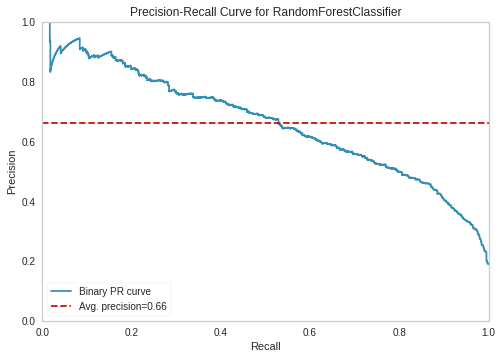

In [ ]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=8, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec = recall_score(y_test, y_pred, average = None)
rf_tfidf_f1 = f1_score(y_test, y_pred, average = None)
rf_tfidf_AP = viz.score_

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3481  227]
 [ 340  480]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3708
           1       0.68      0.59      0.63       820

    accuracy                           0.87      4528
   macro avg       0.79      0.76      0.78      4528
weighted avg       0.87      0.87      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14831
           1       0.80      0.66      0.73      3281

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1     12.333       0.358          0.873           0.684        0.549    0.609
2     11.246       0.372          0.876           0.695        0.562    0.622
3     11.283       0.364          0.883           0.701        0.616    0.656
4     11.293       0.367          0.877           0.687        0.588    0.634
5     11.159       0.362          0.878           0.700        0.570    0.629
6     11.245       0.366          0.877           0.687        0.588    0.634
7     12.232       0.368          0.876           0.685        0.582    0.629
8     11.232       0.359          0.883           0.728        0.564    0.636
9     12.131       0.352          0.878           0.708        0.555    0.622
10    11.254       0.367          0.887           0.732        0.591    0.654

In [ ]:
df_scores.mean()[2:]

test_accuracy    0.879
test_precision   0.701
test_recall      0.577
test_f1          0.632
dtype: float64

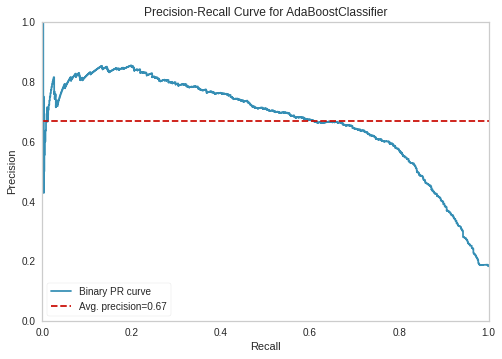

In [ ]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, average = None)
ada_count_f1 = f1_score(y_test, y_pred, average = None)
ada_AP = viz.score_

### TF-IDF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3470  238]
 [ 350  470]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3708
           1       0.66      0.57      0.62       820

    accuracy                           0.87      4528
   macro avg       0.79      0.75      0.77      4528
weighted avg       0.86      0.87      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.83      0.71      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1     34.702       0.356          0.861           0.644        0.518    0.574
2     34.063       0.354          0.872           0.678        0.562    0.615
3     36.225       0.356          0.880           0.690        0.610    0.647
4     34.227       0.349          0.870           0.675        0.546    0.604
5     34.124       0.359          0.886           0.715        0.619    0.663
6     34.113       0.356          0.869           0.657        0.579    0.616
7     35.075       0.358          0.879           0.688        0.604    0.643
8     34.215       0.359          0.890           0.741        0.601    0.663
9     35.196       0.352          0.875           0.690        0.564    0.621
10    34.252       0.356          0.877           0.692        0.582    0.632

In [ ]:
df_scores.mean()[2:]

test_accuracy    0.876
test_precision   0.687
test_recall      0.578
test_f1          0.628
dtype: float64

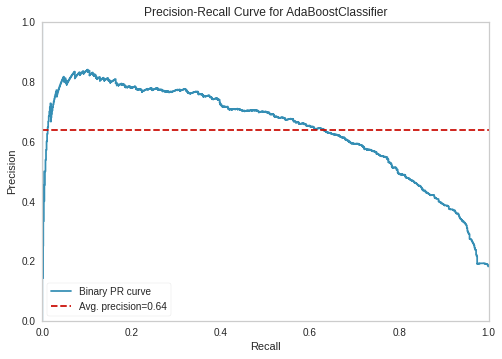

In [ ]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec = recall_score(y_test, y_pred, average = None)
ada_tfidf_f1 = f1_score(y_test, y_pred, average = None)
ada_tfidf_AP = viz.score_

## DL modeling

### Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
num_words = 15000
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.max()

116

In [ ]:
num_tokens.argmax()

16263

In [ ]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [ ]:
len(X_num_tokens[16263]) # same with num_tokens.max()

116

In [ ]:
max_tokens = 103

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9564929328621908

### Fixing token counts of all documents (pad_sequences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(22640, 103)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

### Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.01) # i tried some and this is best

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 103, 50)           750000    
                                                                 
 dropout (Dropout)           (None, 103, 50)           0         
                                                                 
 gru (GRU)                   (None, 103, 48)           14400     
                                                                 
 dropout_1 (Dropout)         (None, 103, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 dropout_2 (Dropout)         (None, 103, 24)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 22s 221ms/step - loss: 0.4981 - recall: 0.7568 - val_loss: 0.5232 - val_recall: 0.9390
Epoch 2/10
71/71 [==============================] - 14s 201ms/step - loss: 0.3052 - recall: 0.8985 - val_loss: 0.3142 - val_recall: 0.8683
Epoch 2: early stopping


In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  recall  val_loss  val_recall
0 0.498   0.757     0.523       0.939
1 0.305   0.899     0.314       0.868

<AxesSubplot:>

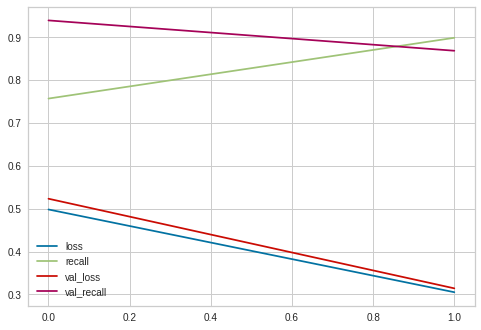

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 4s 21ms/step
[[2579 1129]
 [  50  770]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.70      0.81      3708
           1       0.41      0.94      0.57       820

    accuracy                           0.74      4528
   macro avg       0.69      0.82      0.69      4528
weighted avg       0.88      0.74      0.77      4528



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 11s 19ms/step
[[10673  4158]
 [  140  3141]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     14831
           1       0.43      0.96      0.59      3281

    accuracy                           0.76     18112
   macro avg       0.71      0.84      0.71     18112
weighted avg       0.89      0.76      0.79     18112



142/142 [==============================] - 3s 19ms/step


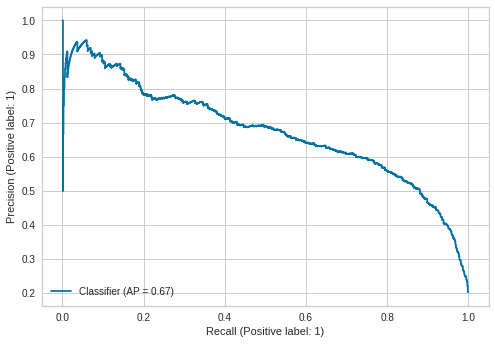

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

142/142 [==============================] - 2s 17ms/step


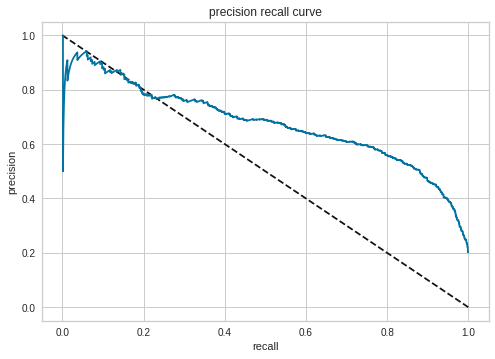

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
print(average_precision_score(y_test, y_pred_proba))

0.6745832290976986


In [ ]:
ANN_rec = 0.95
ANN_f1 = 0.65
ANN_AP = 0.77

In [ ]:
model.save('best_dl_model.h5')

## BERT Modeling

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
text = X[1]

In [ ]:
tokenizer.tokenize(text)

['love',
 'this',
 'dress',
 '!',
 'it',
 "'",
 's',
 'soo',
 '##o',
 'pretty',
 '.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store',
 ',',
 'and',
 'i',
 "'",
 'm',
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 'it',
 "'",
 's',
 'petite',
 '.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5',
 "'",
 '8',
 '"',
 '.',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me',
 '-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee',
 '.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite',
 '.']

In [ ]:
max_token = []
for sent in X: #tüm textlerdeki tokenleri bir liste içine attık

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [ ]:
np.array(max_token).mean()

76.75764134275619

In [ ]:
sum(np.array(max_token) < 130) / len(max_token)

0.956934628975265

In [ ]:
max_token = 130

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 130
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True, # I allowed for truncation 
                                      padding='max_length', add_special_tokens=True) # we protected special tokens in our text
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask  #textimizi veöktörlerden matrislere dönüştürdük

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 130)
Xmask_train.shape : (20376, 130)
Xids_test.shape   : (2264, 130)
Xmask_test.shape  : (2264, 130)


In [ ]:
y_train.shape

(20376,)

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train_arr = np.array(y_train) # we had a error when reshaping y_train so that we changed it to array

In [ ]:
y_train_arr.shape

(20376,)

In [ ]:
type(y_train_arr)

numpy.ndarray

In [ ]:
labels_train = y_train_arr.reshape(-1,1)

In [ ]:
y_train.shape

(20376,)

In [ ]:
y_test_arr = np.array(y_test) # we had a error when reshaping y_train so that we changed it to array

In [ ]:
#labels_train = np.array(y_train).reshape(-1,1)

In [ ]:
labels_test = y_test_arr.reshape(-1,1)

In [ ]:
y_test.shape

(2264,)

In [ ]:
y_test_arr.shape

(2264,)

### Transformation text to tensor

In [ ]:
import tensorflow as tf

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))#Train i tensörlere çevirdik
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test)) #test i tensörlere çevirdik
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [ ]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 32 

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size) 
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) 

### Creating Model

In [ ]:
def create_model(): 
    from transformers import TFAutoModel 
    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-uncased")
    input_ids = tf.keras.layers.Input(shape=(130,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(130,), name='attention_mask', dtype='int32')
   

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
 
    x = tf.keras.layers.Dense(130, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1  #dropout 
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)  

In [ ]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 130)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 130)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 130,                                           

In [ ]:
history = model3.fit(
    train_ds2, validation_data= val_ds, class_weight= {0:1, 1:4}, epochs=1) #epoch= 2 or 3

637/637 [==============================] - 206s 192ms/step - loss: 0.7700 - recall: 0.7440 - val_loss: 0.4763 - val_recall: 0.9610


In [ ]:
summary = pd.DataFrame(model3.history.history)
summary.head()

loss  recall  val_loss  val_recall
0 0.770   0.744     0.476       0.961

### Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

71/71 [==============================] - 18s 182ms/step
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1854
           1       0.40      0.96      0.57       410

    accuracy                           0.73      2264
   macro avg       0.70      0.82      0.69      2264
weighted avg       0.88      0.73      0.76      2264



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5
#tahminde karıştırılmamış data seti kullan


print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 18s 27ms/step
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     16685
           1       0.43      0.98      0.60      3691

    accuracy                           0.76     20376
   macro avg       0.71      0.84      0.71     20376
weighted avg       0.89      0.76      0.79     20376



71/71 [==============================] - 3s 28ms/step


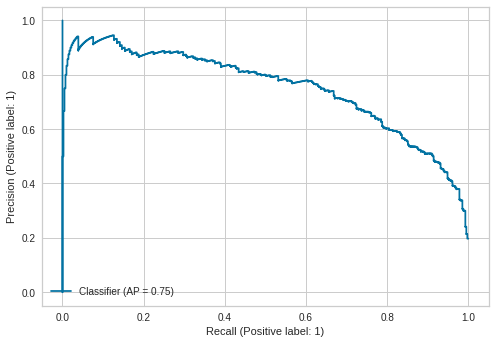

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
bert_rec = 0.87
bert_f1 = 0.69
bert_AP = 0.77

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "BERT", "ANN"],
                        "F1_Score": [nb_count_f1, log_count_f1[1], svc_count_f1[1], 
                                             rf_count_f1[1], ada_count_f1[1], nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1[1], ada_tfidf_f1[1], bert_f1, ANN_f1],
                        "Recall_Score": [nb_count_rec, log_count_rec[1], svc_count_rec[1],
                                                  rf_count_rec[1], ada_count_rec[1],
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec,
                                                  rf_tfidf_rec[1], ada_tfidf_rec[1], bert_rec, ANN_rec],
                        "Precision_Recall_Score": [nb_AP_count, log_AP, svc_AP, rf_AP,
                                                          ada_AP, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                          rf_tfidf_AP, ada_tfidf_AP, bert_AP, ANN_AP]})

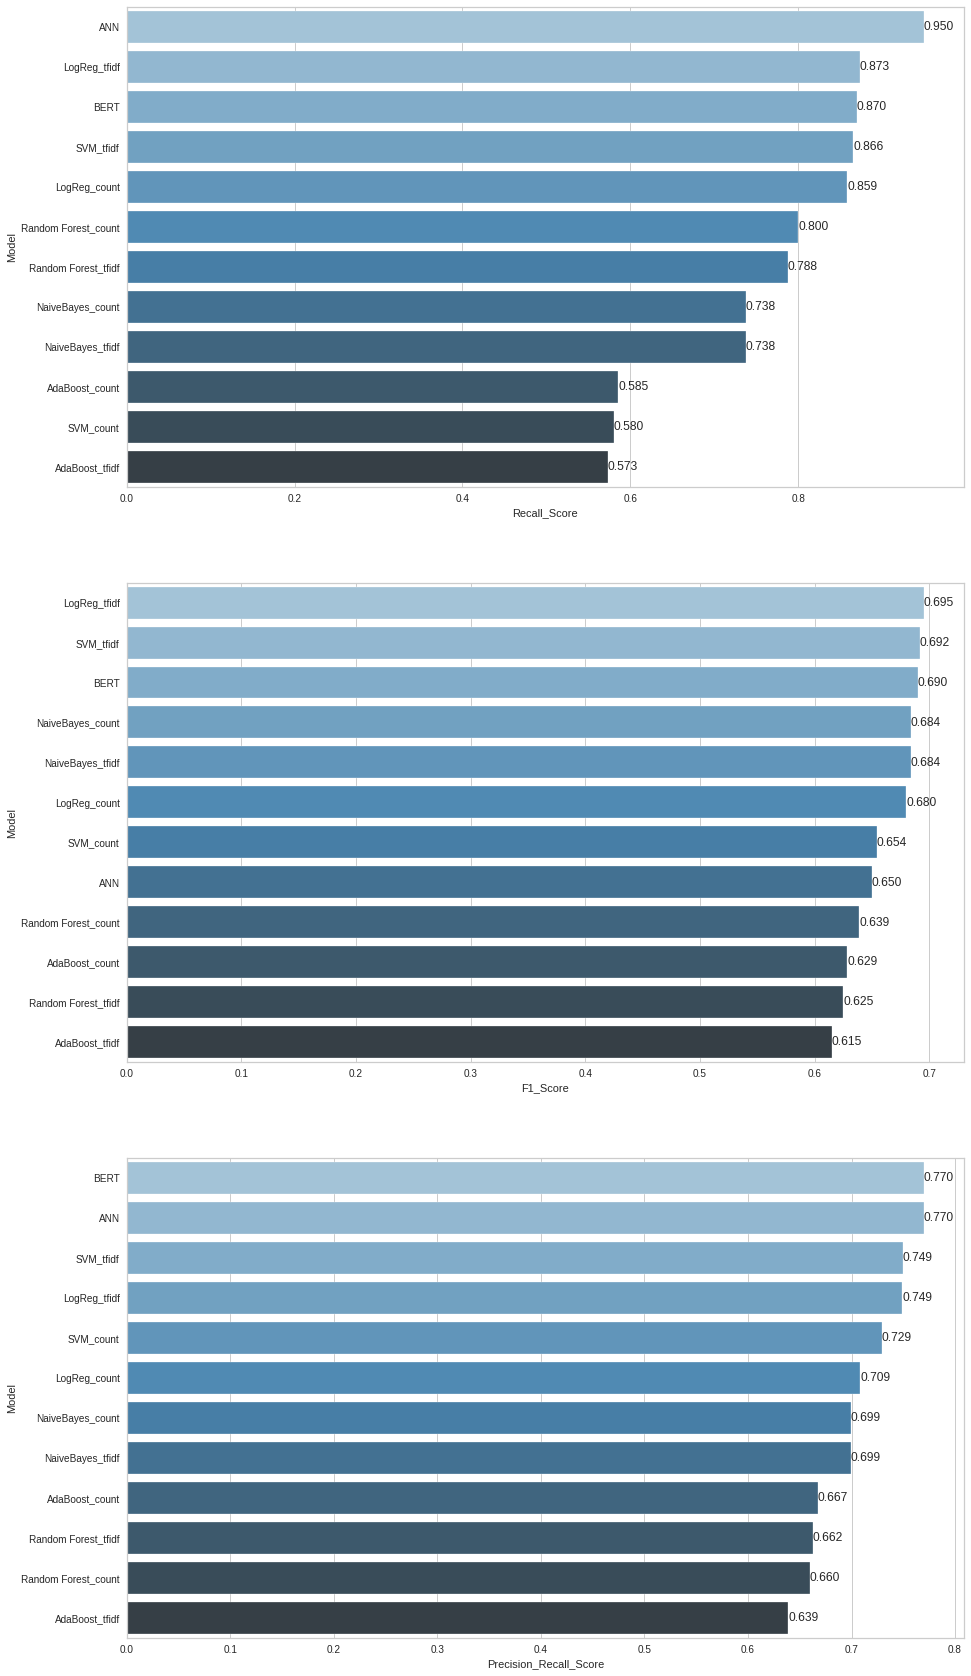

In [ ]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

- BERT, 
- ANN, 
- SVM TF_idf, 
- Logistic TF_idf 
> are the **most effective models** according to the confusion matrix metrics. One of them can be preferred

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___